In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import pathlib
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matminer.featurizers.structure import XRDPowderPattern

from algorithms import pca_algo, kmeans_algo, nmf_algo, tsne_algo
from val_sort import sort_clusterlabels_defects, name_change, plot2d, plot3d, hyperparameter_testing

In [73]:
pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\xrd_La_del_defects5_65_m.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[ 1.43364347 -5.05458306 1.7612222 ] Hf, [ 1...",Hf14La2O32_sc122_No14_1.cif,1.472293e-10,8.532576e-07,2.578637e-04,4.063724e-03,3.339507e-03,1.431082e-04,3.197943e-07,3.726498e-11,...,0.041918,0.021587,0.014583,0.015887,0.026094,0.025738,0.008137,0.019528,0.013601,0.004649
1,"[[-3.63321709 0.12925241 -9.6815268 ] La, [-1...",Hf14La2O32_sc122_No14_10.cif,4.557370e-10,1.775334e-06,4.258716e-04,6.292235e-03,5.727035e-03,3.335255e-04,7.975996e-04,3.154909e-03,...,0.041638,0.018344,0.013135,0.014989,0.031637,0.023384,0.005802,0.018399,0.013883,0.005251
2,"[[-3.73360452 0.13446417 -9.63545356] La, [-1...",Hf14La2O32_sc122_No14_11.cif,1.942164e-10,1.042823e-06,3.048087e-04,4.854189e-03,4.215847e-03,2.047776e-04,3.852597e-04,1.634325e-03,...,0.043729,0.021451,0.011000,0.014663,0.032456,0.022419,0.005942,0.018172,0.011487,0.005543
3,"[[-3.64748426 0.22497602 -4.26243513] Hf, [-3...",Hf14La2O32_sc122_No14_2.cif,4.871397e-11,4.060483e-07,1.657866e-04,3.315652e-03,3.248151e-03,1.558659e-04,3.663647e-07,4.218168e-11,...,0.042410,0.024217,0.010658,0.009054,0.034168,0.027026,0.009411,0.017121,0.009281,0.004217
4,"[[1.41818387 0.19806804 7.03567622] Hf, [1.419...",Hf14La2O32_sc122_No14_3.cif,9.625799e-36,4.379303e-27,9.334900e-20,9.323512e-14,4.363540e-09,9.569902e-06,9.835564e-04,4.737213e-03,...,0.043397,0.021691,0.008750,0.011417,0.042164,0.020374,0.007633,0.019234,0.008034,0.002856
5,"[[ -3.75517322 -10.38359532 0.91453015] La, ...",Hf14La2O32_sc122_No14_4.cif,7.386723e-11,5.050426e-07,1.793954e-04,3.312441e-03,3.180545e-03,1.660646e-04,5.944779e-04,2.509589e-03,...,0.042546,0.022917,0.015095,0.013462,0.027211,0.025786,0.008371,0.019638,0.010554,0.004395
6,"[[ -3.68506745 -10.33083145 0.71110961] La, ...",Hf14La2O32_sc122_No14_5.cif,2.041654e-10,9.519018e-07,2.577667e-04,4.053991e-03,3.703042e-03,2.170356e-04,1.066027e-03,3.198576e-03,...,0.037051,0.016502,0.014790,0.015349,0.030190,0.024879,0.005845,0.017688,0.011578,0.001999
7,"[[ 1.31045349 10.37168009 1.65995274] La, [3....",Hf14La2O32_sc122_No14_6.cif,9.435347e-11,6.308836e-07,2.212526e-04,4.069924e-03,3.926944e-03,2.027411e-04,3.501605e-04,1.605071e-03,...,0.042701,0.019262,0.010203,0.007439,0.038187,0.024768,0.007367,0.017501,0.007366,0.005105
8,"[[ -3.74627537 -10.31057474 0.93832042] La, ...",Hf14La2O32_sc122_No14_7.cif,3.213128e-11,2.453796e-07,9.174728e-05,1.679548e-03,1.505348e-03,7.157781e-05,5.110157e-04,2.321764e-03,...,0.042857,0.018904,0.008736,0.012196,0.043197,0.018409,0.006676,0.021089,0.008375,0.005487
9,"[[-3.73828673 0.08740746 -9.76297697] La, [-1...",Hf14La2O32_sc122_No14_8.cif,5.775617e-10,2.185769e-06,4.584816e-04,5.330296e-03,3.434737e-03,1.336579e-04,7.466759e-04,2.815216e-03,...,0.020882,0.016704,0.007111,0.009877,0.046688,0.024657,0.010440,0.012091,0.007213,0.002866


In [75]:
labels_true = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\data\data_labels\La_defects_labels_m.pkl")
labels_true.value_counts()
labels_true

0        2La
1        2La
2        2La
3        2La
4        2La
5        2La
6        2La
7        2La
8        2La
9        2La
10       2La
11       2La
12       2La
13       2La
14       2La
15       2La
16       2La
17       2La
18       2La
19       2La
20       2La
21       2La
22       2La
23       2La
24       2La
25       2La
26       2La
27       2La
28       2La
29       2La
30       2La
31       2La
32       2La
33       2La
34       2La
35       2La
36       2La
37       2La
38       2La
39       2La
40       2La
41       2La
42       2La
43       2La
44       2La
45       2La
46       2La
47       2La
48       2La
49       2La
50       2La
51       2La
52       2La
53       2La
54       2La
55       2La
56       2La
57       2La
58       2La
59       2La
60       2La
61       LaV
62       LaV
63       LaV
64       LaV
65       LaV
66       LaV
67       LaV
68       LaV
69       LaV
70       LaV
71       LaV
72       LaV
73       LaV
74       LaV
75       LaV
76       LaV

In [76]:
X = df.iloc[:,2:]

In [77]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.01907169e-001, 2.61423314e-001, 4.44189013e-001, ...,
        8.98415365e-001, 5.28517649e-001, 3.06231545e-001],
       [3.15445853e-001, 5.43931467e-001, 7.33594874e-001, ...,
        8.37197745e-001, 5.43654170e-001, 3.50639928e-001],
       [1.34430105e-001, 3.19502724e-001, 5.25055190e-001, ...,
        8.24946078e-001, 4.15025844e-001, 3.72105538e-001],
       ...,
       [1.10309094e-117, 1.81679861e-102, 1.15623493e-087, ...,
        2.25882276e-002, 6.26467558e-001, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.43456252e-002, 4.86426724e-001, 8.49587080e-001],
       [6.25009708e-004, 5.33300893e-003, 2.30370328e-002, ...,
        3.23699491e-001, 3.82369975e-001, 7.51197179e-001]])

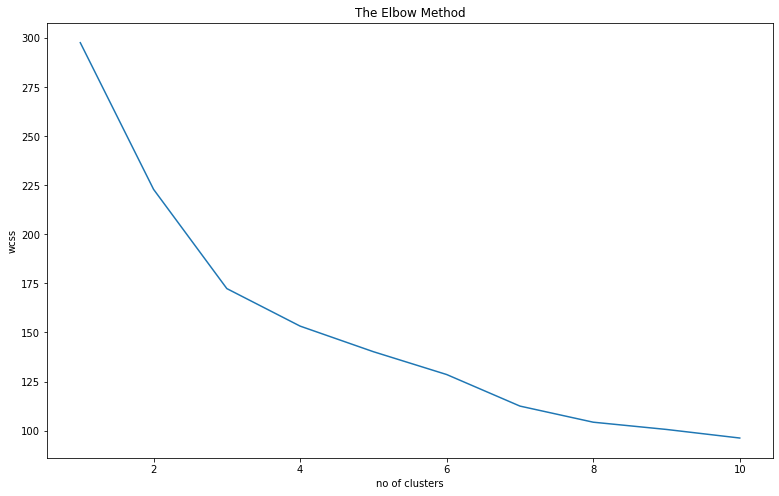

In [78]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [79]:
# PCA Testing

[ 30.2  51.5  61.2  69.2  74.3  78.6  81.9  84.4  86.5  88.5  90.3  91.7
  93.   94.2  95.   95.7  96.4  97.   97.5  97.9  98.2  98.5  98.7  98.9
  99.1  99.3  99.4  99.5  99.6  99.7  99.8  99.9 100.  100.1 100.1 100.1
 100.1 100.1 100.1 100.1 100.1 100.1 100.1 100.1 100.1 100.1 100.1 100.1
 100.1 100.1]


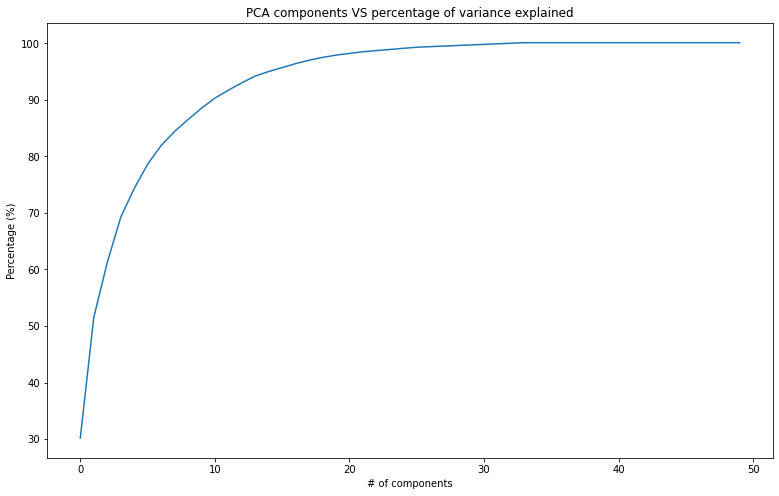

In [80]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
print(variance_ratio)
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [81]:
comp = 30 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, 5)

In [82]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.24482187792611565

In [83]:
dfpca_kmeans['labels'] = labels_true

In [84]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

In [85]:
pd.set_option('display.max_rows', None)
dfpca_kmeans3

,x1,x2,x3,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,cluster,labels
0,1.340469,-0.232902,-0.315250,0.233104,-0.416928,-0.348552,-0.334277,0.205729,0.328640,-0.223329,...,-0.001558,0.069023,-0.142467,-0.049293,-0.107349,0.046875,-0.013092,-0.065496,2,2La
1,1.296995,-0.119344,-0.561095,0.727801,0.154736,0.038468,-0.322935,0.134561,-0.111199,-0.375675,...,0.005646,-0.211312,-0.035535,0.001817,-0.034671,0.006646,-0.063574,-0.003713,2,2La
2,1.355051,-0.397592,-0.424435,0.503478,-0.050858,-0.072123,-0.144723,0.017828,-0.089560,-0.178053,...,-0.040811,-0.025963,-0.085067,-0.066308,-0.050698,-0.044804,0.040895,0.130004,2,2La
3,1.154532,-0.416148,-0.151145,-0.348843,-0.249679,-0.134373,-0.024201,0.391536,-0.082723,-0.293656,...,0.062025,-0.078294,-0.050455,0.009647,0.053305,-0.018078,0.024109,-0.097657,2,2La
4,1.537644,-0.755658,-0.250685,-0.190525,0.067044,0.002744,0.169906,-0.214866,-0.167023,0.217854,...,0.139473,0.003911,-0.146095,-0.078629,0.094001,0.062254,0.029314,-0.041058,2,2La
5,1.202976,-0.158059,-0.201169,0.096202,-0.498381,-0.134904,-0.240006,-0.154646,-0.045904,-0.023896,...,0.037219,-0.000097,0.002427,0.084408,-0.004809,-0.033664,0.030688,-0.005301,2,2La
6,1.543689,0.092549,-0.254969,0.532368,-0.046722,-0.290578,0.030472,-0.559428,-0.070633,0.121002,...,-0.111300,-0.246838,0.009327,-0.027122,0.031251,0.114245,-0.052893,-0.001124,2,2La
7,1.165316,-0.377919,-0.216555,-0.047626,0.066832,-0.205076,-0.114980,0.105825,-0.214814,0.097194,...,0.025033,-0.079812,-0.081126,0.005002,0.039123,-0.031668,-0.020730,-0.020172,2,2La
8,1.445802,-0.769074,-0.224270,0.118868,-0.096666,-0.327304,0.061868,-0.135706,0.040675,0.319350,...,0.030947,-0.028698,-0.047566,-0.005217,-0.000288,-0.102952,0.042764,0.099909,2,2La
9,1.687809,0.018907,0.238000,0.438682,0.967635,0.113553,-0.321152,0.281639,-0.351377,0.336202,...,-0.052782,0.110453,0.171142,0.089532,-0.049304,-0.040596,-0.037404,-0.013283,2,2La


In [86]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [87]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [88]:
dfpca_kmeans = sort_clusterlabels_defects(dfpca_kmeans, n_clusters = 4)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.6238532110091743


In [89]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[ 8,  0,  0,  4,  0],
       [ 8, 24,  0,  0,  0],
       [ 1,  1, 33, 26,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3]], dtype=int64)

In [90]:
comp = list(range(1, 40 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Best value of performance: 0.6788990825688074 Hyperparameter = 8
Overview: {1: 0.5779816513761468, 2: 0.6238532110091743, 3: 0.6055045871559633, 4: 0.6146788990825688, 5: 0.6055045871559633, 6: 0.6146788990825688, 7: 0.6697247706422018, 8: 0.6788990825688074, 9: 0.6697247706422018, 10: 0.6605504587155964, 11: 0.6605504587155964, 12: 0.6605504587155964, 13: 0.6605504587155964, 14: 0.6697247706422018, 15: 0.6605504587155964, 16: 0.6697247706422018, 17: 0.6605504587155964, 18: 0.6697247706422018, 19: 0.6697247706422018, 20: 0.6605504587155964, 21: 0.6697247706422018, 22: 0.6605504587155964, 23: 0.6697247706422018, 

In [91]:
# TSNE Testing

In [92]:
perplex = 20 # change value here

dftsne = tsne_algo(X, perplex)
dftsne_kmeans = kmeans_algo(dftsne[[0, 1, 2]], n_clusters = 5)

In [93]:
dftsne_kmeans['labels'] = labels_true

In [94]:
metrics.silhouette_score(dftsne, dftsne_kmeans['cluster'], metric='l2')

0.2509792

In [95]:
dftsne_kmeans3 = name_change(dftsne_kmeans)

In [96]:
plot3d(dftsne_kmeans3, 'TSNE 3D Prediction', 'cluster')

In [97]:
plot3d(dftsne_kmeans3, 'TSNE 3D Ground Truth', 'labels')

In [98]:
dftsne_kmeans = sort_clusterlabels_defects(dftsne_kmeans, n_clusters = 4)
acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
print(acc)

0.3944954128440367


In [99]:
confusion_matrix(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])

array([[15,  4,  7,  2,  4],
       [ 4, 20,  6, 17, 18],
       [ 2,  1,  8,  1,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [100]:
#Hyperparameter Testing TSNE

In [101]:
perplexity = list(range(20, 25, 1))
hyperparameter_testing(X,'tsne', perplexity, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Best value of performance: 0.6422018348623854 Hyperparameter = 21
Overview: {20: 0.44954128440366975, 21: 0.6422018348623854, 22: 0.4954128440366973, 23: 0.5137614678899083, 24: 0.46788990825688076}


In [102]:
# NMF Testing 

In [103]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, 5) # calculate clusterlabels and asign labels to W_df_kmeans 

In [104]:
W_df_kmeans['labels'] = labels_true

In [105]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.6252291504963688

In [106]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

In [107]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [108]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [109]:
W_df_kmeans = sort_clusterlabels_defects(W_df_kmeans, n_clusters = 4)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.6055045871559633


In [110]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[39, 11, 22,  0,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0],
       [ 8,  0,  0,  0, 24]], dtype=int64)

In [111]:
# Hyperparameter components testing

In [112]:
components = list(range(2, 10 , 2))
hyperparameter_testing(X,'nmf', components, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Best value of performance: 0.6605504587155964 Hyperparameter = 4
Overview: {2: 0.5779816513761468, 4: 0.6605504587155964, 6: 0.6146788990825688, 8: 0.6605504587155964}


In [40]:
# PRDF Test

In [113]:
pathfile = r'C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\df_prdf_La_Hf_O_m.pkl'
path = pathlib.WindowsPath(pathfile)
df = pd.read_pickle(path)
df

,structure,name,Hf-Hf PRDF r=0.00-0.50,Hf-Hf PRDF r=0.50-1.00,Hf-Hf PRDF r=1.00-1.50,Hf-Hf PRDF r=1.50-2.00,Hf-Hf PRDF r=2.00-2.50,Hf-Hf PRDF r=2.50-3.00,Hf-Hf PRDF r=3.00-3.50,Hf-Hf PRDF r=3.50-4.00,...,O-O PRDF r=10.00-10.50,O-O PRDF r=10.50-11.00,O-O PRDF r=11.00-11.50,O-O PRDF r=11.50-12.00,O-O PRDF r=12.00-12.50,O-O PRDF r=12.50-13.00,O-O PRDF r=13.00-13.50,O-O PRDF r=13.50-14.00,O-O PRDF r=14.00-14.50,O-O PRDF r=14.50-15.00
0,"[[ 1.43364347 -5.05458306 1.7612222 ] Hf, [ 1...",Hf14La2O32_sc122_No14_1.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.068746,0.048433,...,0.067398,0.054218,0.054850,0.057342,0.058457,0.056899,0.061751,0.056606,0.053585,0.059157
1,"[[-3.63321709 0.12925241 -9.6815268 ] La, [-1...",Hf14La2O32_sc122_No14_10.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.081636,0.038746,...,0.061624,0.059210,0.055322,0.056333,0.056402,0.057634,0.062261,0.058236,0.052556,0.057923
2,"[[-3.73360452 0.13446417 -9.63545356] La, [-1...",Hf14La2O32_sc122_No14_11.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.075191,0.035517,...,0.062381,0.057230,0.058465,0.055541,0.055408,0.057389,0.062034,0.057658,0.053438,0.057329
3,"[[-3.64748426 0.22497602 -4.26243513] Hf, [-3...",Hf14La2O32_sc122_No14_2.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.077340,0.038746,...,0.062854,0.056112,0.058151,0.054316,0.059252,0.057511,0.062884,0.055869,0.053781,0.058517
4,"[[1.41818387 0.19806804 7.03567622] Hf, [1.419...",Hf14La2O32_sc122_No14_3.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.073043,0.035517,...,0.061150,0.057489,0.058622,0.054893,0.056071,0.057022,0.062204,0.056921,0.055054,0.056780
5,"[[ -3.75517322 -10.38359532 0.91453015] La, ...",Hf14La2O32_sc122_No14_4.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.081636,0.037132,...,0.066262,0.055767,0.055479,0.055181,0.059252,0.057634,0.060448,0.057605,0.054173,0.058014
6,"[[ -3.68506745 -10.33083145 0.71110961] La, ...",Hf14La2O32_sc122_No14_5.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.073043,0.040361,...,0.061340,0.058521,0.057679,0.055541,0.056535,0.057266,0.060391,0.057132,0.055642,0.056872
7,"[[ 1.31045349 10.37168009 1.65995274] La, [3....",Hf14La2O32_sc122_No14_6.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.079488,0.038746,...,0.060488,0.055853,0.060351,0.055325,0.057264,0.055859,0.063111,0.056921,0.054614,0.056323
8,"[[ -3.74627537 -10.31057474 0.93832042] La, ...",Hf14La2O32_sc122_No14_7.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.075191,0.040361,...,0.061718,0.055767,0.058779,0.057342,0.054944,0.056777,0.062714,0.057237,0.054614,0.056231
9,"[[-3.73828673 0.08740746 -9.76297697] La, [-1...",Hf14La2O32_sc122_No14_8.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.070895,0.041975,...,0.059541,0.054993,0.064752,0.051939,0.050636,0.061304,0.059881,0.055869,0.055103,0.056231


In [114]:
X = df.iloc[:, 2:]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [115]:
comp = 30 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, 5)

In [116]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.19495044277358975

In [117]:
dfpca_kmeans['labels'] = labels_true
labels_true

0        2La
1        2La
2        2La
3        2La
4        2La
5        2La
6        2La
7        2La
8        2La
9        2La
10       2La
11       2La
12       2La
13       2La
14       2La
15       2La
16       2La
17       2La
18       2La
19       2La
20       2La
21       2La
22       2La
23       2La
24       2La
25       2La
26       2La
27       2La
28       2La
29       2La
30       2La
31       2La
32       2La
33       2La
34       2La
35       2La
36       2La
37       2La
38       2La
39       2La
40       2La
41       2La
42       2La
43       2La
44       2La
45       2La
46       2La
47       2La
48       2La
49       2La
50       2La
51       2La
52       2La
53       2La
54       2La
55       2La
56       2La
57       2La
58       2La
59       2La
60       2La
61       LaV
62       LaV
63       LaV
64       LaV
65       LaV
66       LaV
67       LaV
68       LaV
69       LaV
70       LaV
71       LaV
72       LaV
73       LaV
74       LaV
75       LaV
76       LaV

In [118]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

In [119]:
dfpca_kmeans3

,x1,x2,x3,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,cluster,labels
0,-1.421707,-0.653597,-0.407559,-0.036192,-0.132992,0.321678,0.335456,0.128951,-0.455182,-0.605278,...,0.063343,-0.034472,0.095633,0.024890,-0.114616,0.070520,-0.003826,0.069851,3,2La
1,-1.269821,0.163556,-0.390100,0.038632,-0.144783,0.115220,0.531290,-0.211868,-0.373228,0.003545,...,-0.012652,0.214398,-0.081871,0.104990,0.164568,0.239936,-0.201047,-0.098855,3,2La
2,-1.357626,0.259458,-0.535865,0.287470,-0.374808,0.224041,0.612213,-0.046871,-0.359970,0.136243,...,0.123624,-0.120225,0.068941,0.046710,0.075572,-0.143886,-0.002935,-0.066734,3,2La
3,-1.173896,0.146622,-0.304586,-0.039068,-0.134574,-0.231558,0.136329,-0.056084,-0.066867,-0.020324,...,-0.010849,0.042350,-0.065266,-0.141845,-0.012077,0.124936,-0.109600,0.053905,3,2La
4,-1.400905,0.628690,-0.652318,0.099467,-0.368232,-0.233575,0.241516,0.029997,-0.000400,0.261535,...,-0.223021,-0.034131,0.150191,0.063748,0.118053,-0.167656,-0.044671,0.032835,3,2La
5,-1.232403,-0.446092,-0.390725,0.094770,0.018648,-0.168719,0.553824,-0.000686,-0.170955,0.296530,...,0.167566,-0.130607,0.204435,0.131183,0.160180,0.100004,0.069841,-0.013662,3,2La
6,-1.451340,0.246164,0.348530,0.469647,-0.064340,0.568751,0.289352,-0.163534,0.146752,0.758274,...,0.048215,-0.147442,0.006066,-0.227964,-0.021256,-0.131250,0.102486,-0.105219,1,2La
7,-1.013358,0.509215,-0.242409,0.090083,-0.223383,-0.235251,0.024147,-0.063976,-0.007796,-0.040029,...,0.152154,-0.093254,-0.106442,-0.010160,-0.030774,-0.004508,-0.073758,-0.149088,3,2La
8,-1.381871,0.382031,-0.609679,-0.027379,-0.289287,0.164857,0.001474,0.152761,-0.325134,-0.077591,...,-0.282846,0.013304,0.021444,-0.158919,0.000592,-0.154453,0.061079,-0.155465,3,2La
9,-1.317751,1.743590,0.687156,0.356229,-0.506304,-0.604501,-0.070756,-0.522437,0.292831,-0.528557,...,-0.048978,-0.163364,-0.177667,-0.285374,-0.129726,0.076443,-0.082555,0.027469,1,2La


In [120]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [121]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [122]:
dfpca_kmeans = sort_clusterlabels_defects(dfpca_kmeans, n_clusters = 4)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.6055045871559633


In [123]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[36,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 1,  8, 26, 26,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4]], dtype=int64)

In [124]:
comp = list(range(1, 40 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Best value of performance: 0.6697247706422018 Hyperparameter = 38
Overview: {1: 0.5229357798165137, 2: 0.5321100917431193, 3: 0.5779816513761468, 4: 0.5871559633027523, 5: 0.6330275229357798, 6: 0.5688073394495413, 7: 0.6238532110091743, 8: 0.6422018348623854, 9: 0.6055045871559633, 10: 0.5963302752293578, 11: 0.6146788990825688, 12: 0.5412844036697247, 13: 0.5963302752293578, 14: 0.6422018348623854, 15: 0.5412844036697247, 16: 0.5229357798165137, 17: 0.5963302752293578, 18: 0.5963302752293578, 19: 0.6146788990825688, 20: 0.5504587155963303, 21: 0.6055045871559633, 22: 0.6146788990825688, 23: 0.5321100917431193,

In [125]:
# TSNE Testing

In [126]:
perplex = 20 # change value here

dftsne = tsne_algo(X, perplex)
dftsne_kmeans = kmeans_algo(dftsne[[0, 1, 2]], n_clusters = 5)

In [127]:
dftsne_kmeans['labels'] = labels_true

In [128]:
metrics.silhouette_score(dftsne, dftsne_kmeans['cluster'], metric='l2')

0.2657491

In [129]:
dftsne_kmeans3 = name_change(dftsne_kmeans)

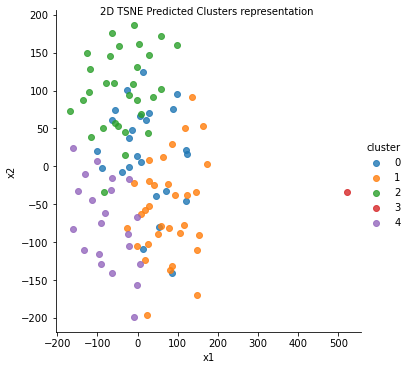

In [130]:
plot2d(dftsne_kmeans3,"2D TSNE Predicted Clusters representation",'cluster')

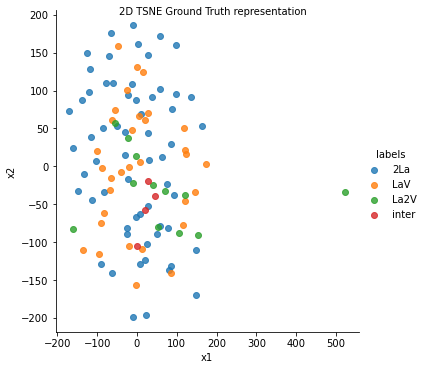

In [131]:
plot2d(dftsne_kmeans3,"2D TSNE Ground Truth representation",'labels')

In [132]:
plot3d(dftsne_kmeans3, 'TSNE 3D Ground Truth', 'labels')

In [133]:
plot3d(dftsne_kmeans3, 'TSNE 3D Prediction', 'cluster')

In [134]:
dftsne_kmeans = sort_clusterlabels_defects(dftsne_kmeans, n_clusters = 4)
acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
print(acc)

0.48623853211009177


In [135]:
confusion_matrix(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])

array([[18,  4,  2,  0,  8],
       [ 5,  8,  1,  1,  1],
       [ 2, 20, 27,  0, 12],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [136]:
#Hyperparameter Testing TSNE

In [137]:
perplexity = list(range(20, 25, 1))
hyperparameter_testing(X,'tsne', perplexity, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Best value of performance: 0.5229357798165137 Hyperparameter = 23
Overview: {20: 0.42201834862385323, 21: 0.47706422018348627, 22: 0.45871559633027525, 23: 0.5229357798165137, 24: 0.43119266055045874}


In [138]:
# NMF Testing 

In [139]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, 5) # calculate clusterlabels and asign labels to W_df_kmeans 

In [140]:
W_df_kmeans['labels'] = labels_true

In [141]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

0.5742210823551338

In [142]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

In [143]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [144]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [145]:

W_df_kmeans = sort_clusterlabels_defects(W_df_kmeans, n_clusters = 4)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

0.5229357798165137


In [146]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

array([[ 9,  0,  4,  0,  3],
       [ 0, 33, 23,  1,  4],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [14,  0,  3,  0, 15]], dtype=int64)

In [147]:
# Hyperparameter components testing

In [148]:
components = list(range(2, 10 , 2))
hyperparameter_testing(X,'nmf', components, labels_true, keyword = 'defects', n_clusters = 4)

Round: 1
Round: 2
Round: 3
Round: 4
Best value of performance: 0.6605504587155964 Hyperparameter = 4
Overview: {2: 0.48623853211009177, 4: 0.6605504587155964, 6: 0.5321100917431193, 8: 0.6605504587155964}
